<body style="font-family:courier;">
<h1>Kalibrierung und Einsatz eines Infrarot-Entfernungsmessers</h1>
<body style="font-family:courier;">
<h3>Versuch 1, Praktikum Signale, Systeme und Sensoren</h3>

<body style="font-family:courier;">
<h3>Teil 1: Einlesen der Daten</h3>
<pre>
<body style="font-family:courier;">
Erstellen Sie eine Python-Funktion, welche die Daten aus der Datei einliest (verwenden Sie
dazu die Numpy-Funktion genfromtxt()), von den Daten die ersten 1000 Werte überspringt
und aus den nächsten Werten (nehmen Sie eine sinnvolle Anzahl von Messungen) den
Mittelwert und die Standardabweichung berechnet (der Einschwingvorgang wird dadurch
ignoriert).
Vergleichen Sie die Ergebnisse mit den Werten aus ihrem Messprotokoll. Stellen
Sie die gefundene Übertragungsfunktion bzw. Kennlinie im Protokoll graphisch mit Python
bzw. Matplotlib dar.
Beachten Sie bei dem Messverfahren, dass es dadurch, dass jeder Abstandswert nur einmal
eingestellt wird, zu einer systematischen Unterschätzung des Messfehlers kommt. Eigentlich
müsste in jeder Messung der Abstand mehrmals eingestellt werden, um zu einer realistischen
Fehlerschätzung zu kommen.
</pre>

In [1]:
import numpy as np
from io import StringIO

distances = [13, 16, 19, 22, 25, 28, 31, 34, 37, 40,
             43, 46, 49, 52, 55, 58, 61, 64, 67, 70]

means = []
stds  = []
for idx, dist in enumerate(distances):

    with open(("data%d.csv"%dist)) as file:
        txt = file.read()

        txt = txt.replace(",", ".")
        a = np.genfromtxt(StringIO(txt), skip_header=1000, delimiter=";", usecols=(1,))
        means.append(np.mean(a))
        stds.append( np.std (a))
        logmeans = np.log(means)
        logdist  = np.log(distances)

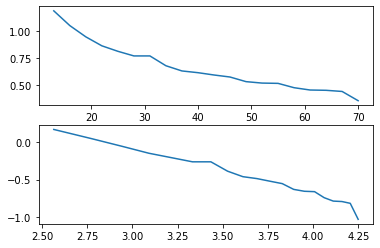

In [18]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(distances, means)
axs[1].plot(logdist, logmeans)

<body style="font-family:courier;">
<h3>Teil 2: Modellierung der Kennlinie durch lineare Regression</h3>
<pre>
<body style="font-family:courier;">
Um den Sensor als Abstandsmesser benutzen zu können, brauchen wir eine Umrechnungsvor-
schrift, mit der wir aus den gemessenen Spannungswerten die zugehörigen Entfernungswerte
berechnen können. Die in der Vorlesung vorgestellte Methode der linearen Regression funktio-
niert für den Sharp-Sensor nicht, da es sich hier eindeutig um einen Sensor mit nichtlinearer
Kennlinie handelt.
Es gibt aber einen einfachen, häufig eingesetzten Trick, mit dem sich die
lineare Regression auch bei allgemeinen nichtlinearen Kennlinien der Form
                                    y = xa
anwenden lässt: statt die Regression direkt auf den Werten x und y zu berechnen, werden
Eingangs- und Ausgangswerte zunächst logarithmiert, d.h. wir erhalten neue Paare aus
Eingangs- und Ausgangswerten
        xÕ und y Õ mit y Õ = ln y und xÕ = ln x bzw. umgekehrt x = ex Õ.
Setzt man beides in die Kennlinie ein, so ergibt sich
            y Õ = ln y = ln(xa ) = a · ln x = a · ln(ex Õ) = a · xÕ
d.h. nach der doppelten Logarithmierung ist die Kennlinie eine Gerade mit Steigung a. Die
Parameter dieser Gerade können wir wiederum mit der linearen Regression schätzen.
Sie erhalten aus der Regression die Parameter a und b für den Zusammenhang
                            y Õ = a · xÕ + b.
Die Rückrechnung auf den ursprünglichen Zusammenhang geschieht über die Umkehrung
der doppelten Logarithmierung:
                    y = exp(a · ln x + b) = eb · xa
wobei x hier die Spannungsmessung und y die daraus resultierende Abstandsmessung darstellt.
Damit haben wir die nichtlineare Kennlinie des Sensors gefunden.
</pre>

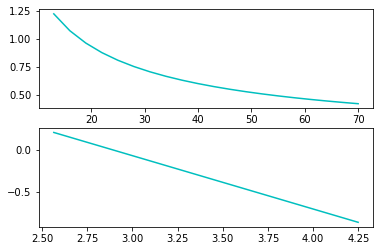

In [19]:
from matplotlib import pyplot as plt

avgx = np.average(logdist)
avgy = np.average(logmeans)
d = np.zeros((20,2))
for i in range(20):
    d[i,0] = (logdist[i] - avgx) * (logmeans[i]- avgy)
    d[i,1] = (logdist[i] - avgx)**2

stg = np.sum(d[:,0])/np.sum(d[:,1])
b = avgy - stg * avgx

fig, axt = plt.subplots(2)

kennliniey = np.exp(b) * distances ** stg
axt[0].plot(distances, kennliniey,'c')
axt[1].plot(logdist, stg*logdist + b,'c')

plt.show()

<body style="font-family:courier;">
<h3>Teil 3: Flächenmessung mit Fehlerrechnung (a)</h3>
<pre>
<body style="font-family:courier;">
------------------------------------------------------------------------------------------
Ermittlung des Messfehlers des Abstandsmessers: Die Kombination aus Sharp-Sensor,
Oszilloskop und der gefundenen Kennlinie stellt eine Messeinrichtung für den Abstand
eines Objektes dar. Durch die Kennlinie wird der Abstand nicht direkt ermittelt, sondern
indirekt über eine Spannungsmessung. Zur Ermittlung des Messfehlers müssen wir also die
Fehlerfortpflanzung durch die Kennlinie eb xa berechnen.
Vorgehensweise:
1. Stellen Sie das Zielobjekt im Abstand eines DIN-A4-Blattes (lange Seite) vom Sensor auf
    und führen Sie eine einzige Messung aus und speichern Sie das Resultat als csv-Datei.
2. Schätzen Sie den Messfehler nach der Methode aus der Vorlesung. Vergessen Sie
    dabei nicht eine eventuelle Korrektur aufgrund der Anzahl von Messungen. Geben
    Sie das Ergebnis Ihrer Spannungsmessung in der korrekten Form an. Wie groß ist der
    Vertrauensbereich für eine Sicherheit von 68 % , wie groß für eine Sicherheit von 95 % ?
3. Geben Sie nun das Ergebnis Ihrer Abstandsmessung in cm in korrekter Form an.
    Benutzen sie dazu die Fehlerfortpflanzung.
------------------------------------------------------------------------------------------
</pre>

In [20]:
import numpy as np
from io import StringIO

#Werte wurden verändert zu Aufgabe 2 (da x und y vertauscht)
b = 2.903898918078259
stg = -1.5510750149120942

#Methode, um Messfehler zu schätzen
def schaetzwert(vals, factor):
    x_ = np.mean(vals) #Mittelwert
    s = np.std(vals, ddof=1) #empirische STandardabweichung
    sx = s / np.sqrt(len(vals)) #standardabweichung für den Mittelwert, gibt Vertrauensbereich an
    dx = factor * sx
    print("x = ", x_ , "+-", dx)
    return x_, dx

#Berechnung lange Seite
with open(("DinA4lang.csv")) as file:
    txt = file.read()

    txt = txt.replace(",", ".")
    longvals = np.genfromtxt(StringIO(txt), skip_header=1000, delimiter=";", usecols=(1,))


print("Vertrauensbereich 68%, lange Seite")
x_1,dx1 = schaetzwert(longvals, 1.09) #Vertrauensbereich 68% und n = 7
print("\nVertrauensbereich 95%, lange Seite")
schaetzwert(longvals, 2.45) #Vertraunsbereich 95% und n = 7

#Fehlerfortpflanzung: Berechnung mit dy = f'(x) * dx
ablf = stg * np.exp(b) * x_1 ** (stg - 1) # Ableitung von f(x) = e^b * x^a
dylang = abs(ablf * dx1)
ylang = np.exp(b) * x_1 ** stg
print("\nLänge des Blattes:", ylang, "cm +-", dylang, "cm")
#b)
with open(("DinA4kurz.csv")) as file:
    txt = file.read()
    txt = txt.replace(",", ".")
    shortvals = np.genfromtxt(StringIO(txt), skip_header=1000, delimiter=";", usecols=(1,))


print("\nVertrauensbereich 68%, kurze Seite")
x_2, dx2 = schaetzwert(shortvals, 1.09) #Vertrauensbereich 68% und n = 7
print("\nVertrauensbereich 95%, kurze Seite")
schaetzwert(shortvals, 2.45) #Vertraunsbereich 95% und n = 7

Vertrauensbereich 68%, lange Seite
x =  0.7407374857142858 +- 0.0037469891118386083

Vertrauensbereich 95%, lange Seite
x =  0.7407374857142858 +- 0.008422131489912468

Länge des Blattes: 29.06080819971129 cm +- 0.22801246954083634 cm

Vertrauensbereich 68%, kurze Seite
x =  0.8926286571428573 +- 0.002911981714285708

Vertrauensbereich 95%, kurze Seite
x =  0.8926286571428573 +- 0.006545279999999986


(0.8926286571428573, 0.006545279999999986)

<body style="font-family:courier;">
<h3>Teil 3: Flächenmessung mit Fehlerrechnung (b)</h3>
<pre>
<body style="font-family:courier;">
------------------------------------------------------------------------------------------
Flächenmessung: Zur Ermittlung der Fläche eines DIN A4-Blattes messen Sie nun nach
derselben Methode wie in Aufgabe 3 a die Breite des Blattes aus. Berechnen Sie daraus
Ihre Schätzung für die Fläche des Blattes und geben Sie Ihr Messergebnis korrekt mit Ihrer
Schätzung des Messfehlers an. Benutzen Sie dazu das Gaußsche Fehlerfortpflanzungsgesetz
aus der Vorlesung
------------------------------------------------------------------------------------------
</pre>

In [22]:
with open(("DinA4kurz.csv")) as file:
    txt = file.read()
    txt = txt.replace(",", ".")
    shortvals = np.genfromtxt(StringIO(txt), skip_header=1000, delimiter=";", usecols=(1,))


print("Vertrauensbereich 68%, kurze Seite")
x_2b, dx2b = schaetzwert(shortvals, 1.09) #Vertrauensbereich 68% und n = 7
print("\nVertrauensbereich 95%, kurze Seite")
schaetzwert(shortvals, 2.45) #Vertraunsbereich 95% und n = 7

#Fehlerfortpflanzung: Berechnung mit dy = f'(x) * dx
ablf = stg * np.exp(b) * x_2b ** (stg - 1) # Ableitung von f(x) = e^b * x^a, f'(x) = e^b * a * x^(a-1)
dykurz = abs(ablf * dx2b)
ykurz = np.exp(b) * x_2b ** stg
print("\nBreite des Blattes:", ykurz, "cm +-", dykurz, "cm")

#Berechnung Fläche des Blattes
#Formel: a = langeSeite * kurzeSeite
a = ylang * ykurz
da = np.sqrt((ylang * dykurz) ** 2 + (ykurz * dykurz) ** 2) #Benutzung der partiellen Ableitung auf die Länge und Breite
print("\nFläche: ", a , "+-", da, "cm")

Vertrauensbereich 68%, kurze Seite
x =  0.8926286571428573 +- 0.002911981714285708

Vertrauensbereich 95%, kurze Seite
x =  0.8926286571428573 +- 0.006545279999999986

Breite des Blattes: 21.760081936125204 cm +- 0.110106040821326 cm

Fläche:  632.3655675557368 +- 3.997367533860461 cm


<body style="font-family:courier;">
<h3>Fläche des A4 Blattes mit Berechnung über Entfernungsmesser: 632 cm^2 (+/- 4 cm Fehlertoleranz)</h3>

<body style="font-family:courier;">
<h4>Berechnung über Laenge: 29 cm  - und Breite: 21 cm </h4>
<body style="font-family:courier;">
<h4>Werte stimmen mit den tatsächlichen Werten eines DinA4-Blattes bis auf den Milimeter überein</h4>